# VotingRegressor

In [22]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
boston=fetch_openml(name='boston',as_frame=True,version=1)
df=pd.DataFrame(boston.data,columns=boston.feature_names)
df['price']=boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.shape

(506, 14)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [ ]:
lr=LinearRegression()
knn=KNeighborsRegressor(n_neighbors=6)
X_train,X_test,y_train,y_test=train_test_split(df[['LSTAT','RM','PTRATIO']],df['price']      #Taking only 3 features for better computations
                                               ,test_size=0.3,random_state=4)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((354, 3), (152, 3), (354,), (152,))

In [ ]:
354+152 #training samples + testing samples = original sample size

506

In [ ]:
pipeline_lin_reg=make_pipeline(StandardScaler(),lr)
pipeline_lin_reg.fit(X_train,y_train)
y_pred=pipeline_lin_reg.predict(X_test)
r2_score(y_test,y_pred)

0.6926956516509607

In [ ]:
from sklearn.pipeline import make_pipeline
pipeline_knn=make_pipeline(StandardScaler(),knn)
pipeline_knn.fit(X_train,y_train)
y_pred=pipeline_knn.predict(X_test)
r2_score(y_test,y_pred)

0.7699392638420474

In [ ]:
new_house=[[12.5,6.2,18.0]]
pred_lr=pipeline_lin_reg.predict(new_house)
pred_knn=pipeline_knn.predict(new_house)
pred_lr,pred_knn

(array([22.47235149]), array([21.9]))

In [ ]:
#predicted price of lin reg = 22.47235149
#predicted price of knn =  21.9

In [ ]:
(22.47235149 + 21.9)/ 2 #Taking average of both model predicted prices = VotingRegressor

22.186175745

In [ ]:
vote_reg = VotingRegressor(estimators=[
    ('lr', pipeline_lin_reg),
    ('knn', pipeline_knn)
])
vote_reg.fit(X_train, y_train)
pred_vote = vote_reg.predict(new_house)
pred_vote

array([22.18617574])

In [ ]:
#Same result for both manual computation and VotingRegrssor computation

#VotingClassifier

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import load_iris

In [ ]:
iris=load_iris()

In [ ]:
df2=pd.DataFrame(data=iris.data,columns=iris.feature_names)
df2['species']=iris.target
df2.head(),df2.shape

(   sepal length (cm)  sepal width (cm)  ...  petal width (cm)  species
 0                5.1               3.5  ...               0.2        0
 1                4.9               3.0  ...               0.2        0
 2                4.7               3.2  ...               0.2        0
 3                4.6               3.1  ...               0.2        0
 4                5.0               3.6  ...               0.2        0
 
 [5 rows x 5 columns],
 (150, 5))

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
dt=DecisionTreeClassifier()
knc=KNeighborsClassifier(n_neighbors=3)
lr=LogisticRegression()

In [ ]:
X_train,x_test,y_train,y_test=train_test_split(df2.drop('species',axis=1),df2['species']
                                               ,test_size=0.2,random_state=4)

In [ ]:
X_train.shape,x_test.shape,y_train.shape,y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [ ]:
120+30

150

In [ ]:
dt.fit(X_train,y_train)
kNC=make_pipeline(StandardScaler(),knc)
kNC.fit(X_train,y_train)
lr.fit(X_train,y_train)

LogisticRegression()

In [ ]:
dt.score(x_test,y_test),kNC.score(x_test,y_test),lr.score(x_test,y_test)

(0.9666666666666667, 0.9, 0.9666666666666667)

In [ ]:
#kNN Classifier performs slight dull than dectree , logreg

In [ ]:
new_species=[5.1,2.2,1.5,0.2]
pred_dt=dt.predict([new_species])
pred_knc=kNC.predict([new_species])
pred_lr=lr.predict([new_species])

In [ ]:
pred_dt,pred_knc,pred_lr

(array([0]), array([1]), array([0]))

In [ ]:
'''Both dectree and logreg predicted class 0 ~ Setosa , but knn classif predicts class 1 ~ Versicolor ,
Take majority voting , class 0 (setosa) is correct value'''

'Both dectree and logreg predicted class 0 ~ Setosa , but knn classif predicts class 1 ~ Versicolor , \nTake majority voting , class 0 (setosa) is correct value'

In [ ]:
vote_classif=VotingClassifier(estimators=[
    ('dt',dt),
    ('knc',kNC),
    ('lr',lr)],voting='hard')

In [ ]:
vote_classif.fit(X_train,y_train)
pred_vote = vote_classif.predict([new_species])
pred_vote

array([0])

In [ ]:
'''Voting Classifier predicts class 0 ~ setosa by taking hard voting,
same output here also'''

'Voting Classifier predicts class 0 ~ setosa by taking hard voting,\nsame output here also'

# BaggingClassifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer=load_breast_cancer()
df3=pd.DataFrame(data=cancer.data,columns=cancer.feature_names)
df3['cancer']=cancer.target
df3.head(),df3.shape

(   mean radius  mean texture  ...  worst fractal dimension  cancer
 0        17.99         10.38  ...                  0.11890       0
 1        20.57         17.77  ...                  0.08902       0
 2        19.69         21.25  ...                  0.08758       0
 3        11.42         20.38  ...                  0.17300       0
 4        20.29         14.34  ...                  0.07678       0
 
 [5 rows x 31 columns],
 (569, 31))

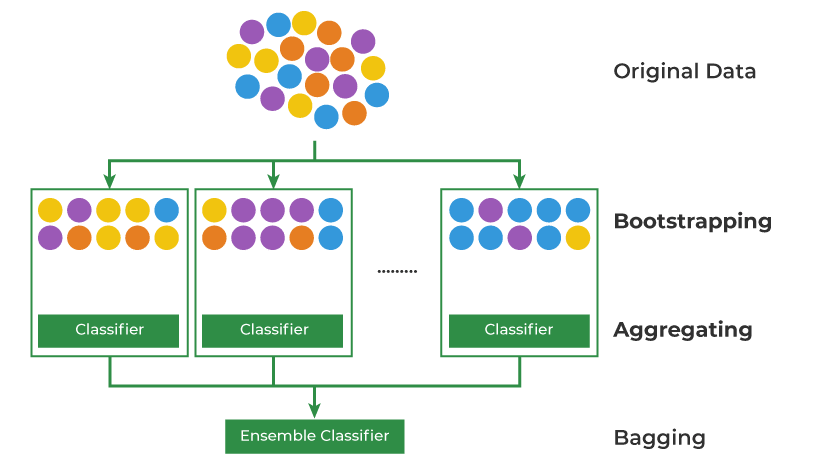

For reference ~ https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df3[['worst concave points', 'mean perimeter', 'mean concave points']], df3['cancer'], test_size=0.3, random_state=5)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 3), (171, 3), (398,), (171,))

In [ ]:
dt.fit(X_train, y_train)
bag=BaggingClassifier(estimator=dt,max_samples=0.5,
                      max_features=3,random_state=5)
bag.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_features=3,
                  max_samples=0.5, random_state=5)

In [ ]:
dt.score(X_test, y_test),bag.score(X_test, y_test)

(0.8947368421052632, 0.9590643274853801)

In [ ]:
# With single dataset , dectree performs dull , using bagging with multiple replaced datasets it performs well

# Stacking

In [17]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns=['thalach','oldpeak','trestbps','disease']
df4=pd.read_csv(url,names=columns)
df4 = df4.dropna()
df4.replace("?", pd.NA, inplace=True)
df4["disease"] = df4["disease"].astype(int)
df4["disease"] = df4["disease"].apply(lambda x: 1 if x > 0 else 0)

In [18]:
df4.head(),df4.shape

(                                                thalach oldpeak trestbps  \
 63.0 1.0 1.0 145.0 233.0 1.0 2.0 150.0 0.0 2.3      3.0     0.0      6.0   
 67.0 1.0 4.0 160.0 286.0 0.0 2.0 108.0 1.0 1.5      2.0     3.0      3.0   
              120.0 229.0 0.0 2.0 129.0 1.0 2.6      2.0     2.0      7.0   
 37.0 1.0 3.0 130.0 250.0 0.0 0.0 187.0 0.0 3.5      3.0     0.0      3.0   
 41.0 0.0 2.0 130.0 204.0 0.0 2.0 172.0 0.0 1.4      1.0     0.0      3.0   
 
                                                 disease  
 63.0 1.0 1.0 145.0 233.0 1.0 2.0 150.0 0.0 2.3        0  
 67.0 1.0 4.0 160.0 286.0 0.0 2.0 108.0 1.0 1.5        1  
              120.0 229.0 0.0 2.0 129.0 1.0 2.6        1  
 37.0 1.0 3.0 130.0 250.0 0.0 0.0 187.0 0.0 3.5        0  
 41.0 0.0 2.0 130.0 204.0 0.0 2.0 172.0 0.0 1.4        0  ,
 (303, 4))

In [19]:
df4['disease'].value_counts()

,count
disease,
0,164
1,139


In [55]:
from sklearn.ensemble import StackingClassifier,RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [38]:
df4.dropna(inplace=True)

In [45]:
df4['oldpeak']=df4['oldpeak'].astype(float)
df4['trestbps']=df4['trestbps'].astype(float)

In [46]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 297 entries, (np.float64(63.0), np.float64(1.0), np.float64(1.0), np.float64(145.0), np.float64(233.0), np.float64(1.0), np.float64(2.0), np.float64(150.0), np.float64(0.0), np.float64(2.3)) to (np.float64(57.0), np.float64(0.0), np.float64(2.0), np.float64(130.0), np.float64(236.0), np.float64(0.0), np.float64(2.0), np.float64(174.0), np.float64(0.0), np.float64(0.0))
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   thalach   297 non-null    float64
 1   oldpeak   297 non-null    float64
 2   trestbps  297 non-null    float64
 3   disease   297 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 26.5 KB


In [30]:
df4.iloc[:,3:]

disease
63.0 1.0 1.0 145.0 233.0 1.0 2.0 150.0 0.0 2.3        0
67.0 1.0 4.0 160.0 286.0 0.0 2.0 108.0 1.0 1.5        1
             120.0 229.0 0.0 2.0 129.0 1.0 2.6        1
37.0 1.0 3.0 130.0 250.0 0.0 0.0 187.0 0.0 3.5        0
41.0 0.0 2.0 130.0 204.0 0.0 2.0 172.0 0.0 1.4        0
...                                                 ...
45.0 1.0 1.0 110.0 264.0 0.0 0.0 132.0 0.0 1.2        1
68.0 1.0 4.0 144.0 193.0 1.0 0.0 141.0 0.0 3.4        1
57.0 1.0 4.0 130.0 131.0 0.0 0.0 115.0 1.0 1.2        1
     0.0 2.0 130.0 236.0 0.0 2.0 174.0 0.0 0.0        1
38.0 1.0 3.0 138.0 175.0 0.0 0.0 173.0 0.0 0.0        0

[303 rows x 1 columns]

In [47]:
from sklearn.pipeline import make_pipeline
pipeline_svc=make_pipeline(
    StandardScaler(),
    SVC(kernel='linear')
)
rf=RandomForestClassifier(n_estimators=100)

In [48]:
X_train,X_test,y_train,y_test=train_test_split(df4.iloc[:, :3],df4.iloc[:, 3]
                                               ,test_size=0.2,random_state=6,shuffle=True)

In [49]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((237, 3), (60, 3), (237,), (60,))

In [50]:
242+61

303

In [51]:
pipeline_svc.fit(X_train,y_train)
rf.fit(X_train,y_train)

RandomForestClassifier()

In [52]:
pred_svc=pipeline_svc.predict(X_test)
pred_rf=rf.predict(X_test)
pipeline_svc.score(X_test,y_test),rf.score(X_test,y_test)

(0.8333333333333334, 0.85)

In [64]:
meta_model=LogisticRegression()

In [65]:
stack_model = StackingClassifier(
    estimators=[
        ('svc', pipeline_svc),
        ('rf', rf)
    ],
    final_estimator=meta_model,
    cv=5
)

In [66]:
stack_model.fit(X_train,y_train)
pred_stacking=stack_model.predict(X_test)

In [68]:
meta_X = pd.DataFrame({
    "svc_pred": pred_svc,
    "rf_pred": pred_rf
})

In [75]:
meta_X.head()

,svc_pred,rf_pred
0,0,0
1,1,1
2,0,0
3,0,0
4,1,0


In [69]:
meta_y = y_test.reset_index(drop=True)
meta_model.fit(meta_X, meta_y)

LogisticRegression()

In [76]:
meta_y.head()

,disease
0,0
1,1
2,0
3,0
4,1


In [71]:
meta_model.intercept_,meta_model.coef_

(array([-1.48951119]), array([[1.35044202, 1.66670661]]))

z = B
0
+
(
𝛽
1
⋅
svc_pred
)
+
(
𝛽
2
⋅
rf_pred
)

In [ ]:
#B0 ~  1.48951119
#𝛽1 ~ 1.35044202 , 𝛽2 ~ 1.66670661

In [77]:
#New patient
new_patient_features = [[160.0, 1.4, 130.0]]  # thalach, oldpeak, trestbps

In [78]:
pred_svc = pipeline_svc.predict(new_patient_features)
pred_rf = rf.predict(new_patient_features)

In [79]:
pred_svc,pred_rf

(array([1]), array([1]))

Intercept: B₀ = −1.4895  
Coefficients: β₁ = 1.3504, β₂ = 1.6667  

Given:
SVC prediction = 1  
Random Forest prediction = 1  

Logit calculation:
z = B₀ + (β₁ × svc_pred) + (β₂ × rf_pred)  
z = −1.4895 + (1.3504 × 1) + (1.6667 × 1)  
z = 1.5276  

Sigmoid probability:
P(y = 1) = 1 / (1 + e^(−1.5276)) ≈ 0.8216  

Conclusion:  
The manual predicted probability is approximately 82.2%,  
so the patient is classified as positive (1).
